# Differences between ``AngularModel`` and ``LinearModel``

In this notebook, simple 1-dimensional models are tested and compared.

In [1]:
from qrobot.models import LinearModel, AngularModel

In [2]:
from model_comparison_utils import test_input, test_query, test_tau_up, plot_versus
import matplotlib.pyplot as plt
import numpy as np

## Models differences

The Models operate different angle encodings:

- given a scalar input $x$, the ``AngularModel`` encodes it with a $\theta$ angle of

$$ \theta(x) = \frac{\pi x}{\tau}$$

- given a scalar input $x$, the ``LinearModel`` encodes it with a $\theta$ angle of

$$ \theta(x) = \frac{\sin^{-1}(2x-1)+\frac{\pi}{2}}{\tau}$$

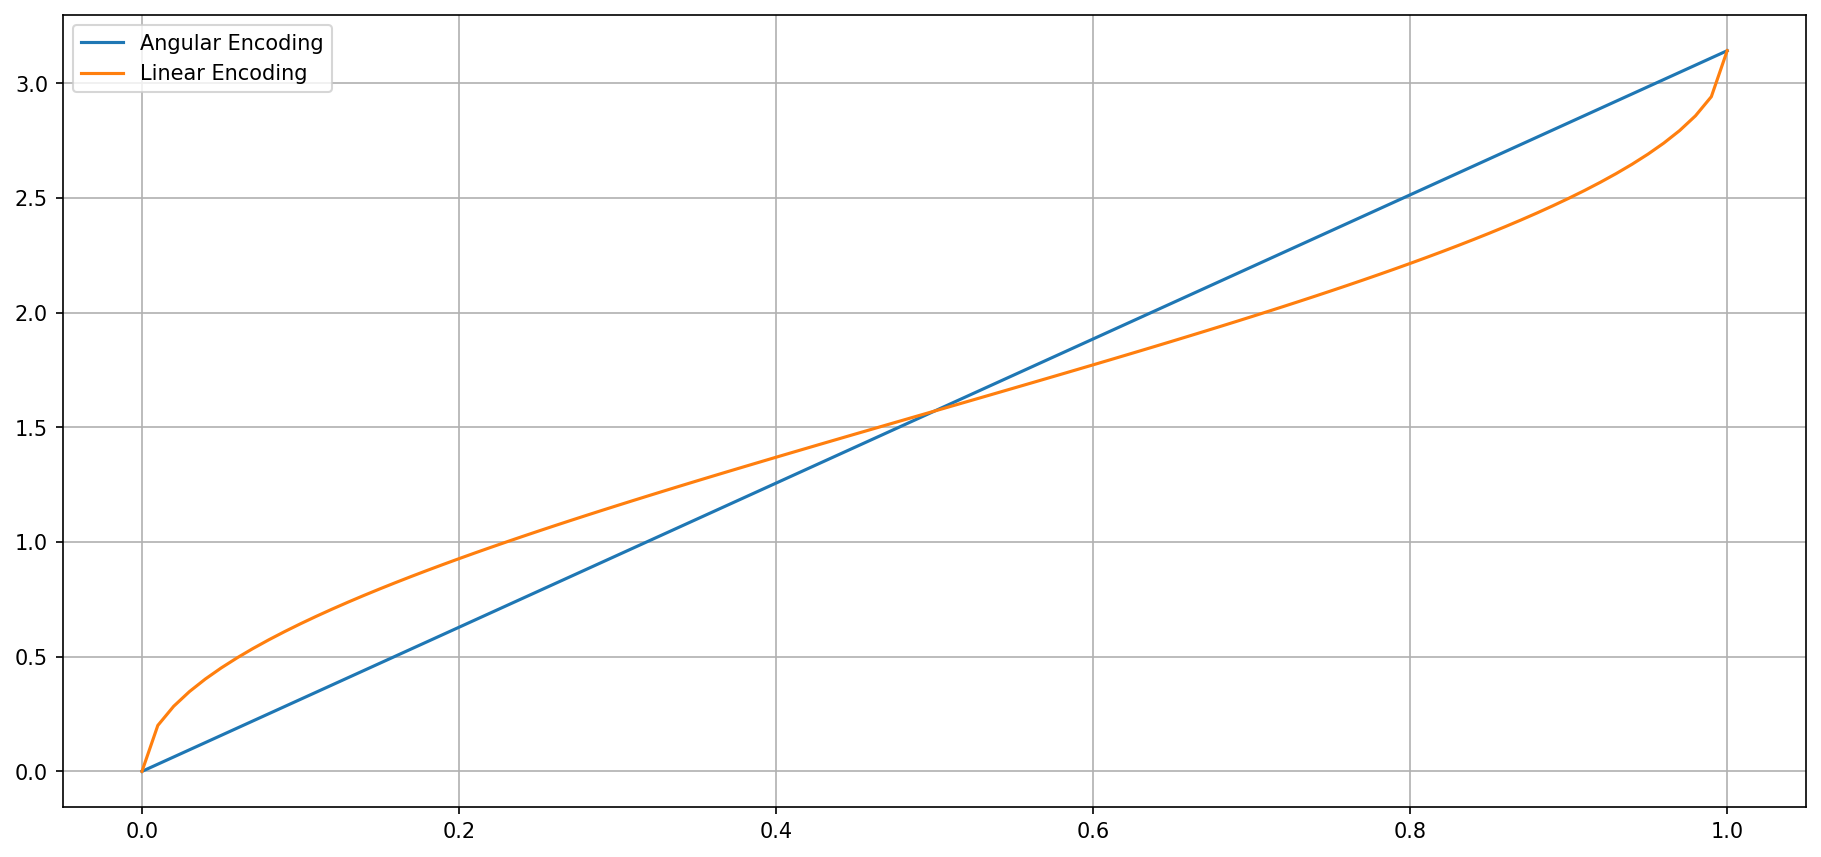

In [3]:
X = [x / 100 for x in range(0, 101)]
Y_angular = [np.pi * x for x in X]
Y_linear = [np.arcsin(2 * x - 1) + np.pi / 2 for x in X]
plt.figure(figsize=(15, 7), dpi=150)
plt.plot(X, Y_angular)
plt.plot(X, Y_linear)
plt.legend(["Angular Encoding", "Linear Encoding"])
plt.grid()
plt.show()

The decoding by means of the measurement probability is:
$$ \text{Probability of measuring } \lvert 1 \rangle = \sin^2 \left( \frac{\theta}{2} \right)$$

Hence, for $\tau = 1$ the ``LinearModel`` elicitates the non-linearity by inverting it:

$$ \text{Prob. } \lvert 1 \rangle = \sin^2 \left(\frac{\sin^{-1}(2x-1)+\frac{\pi}{2}}{2} \right) = x$$

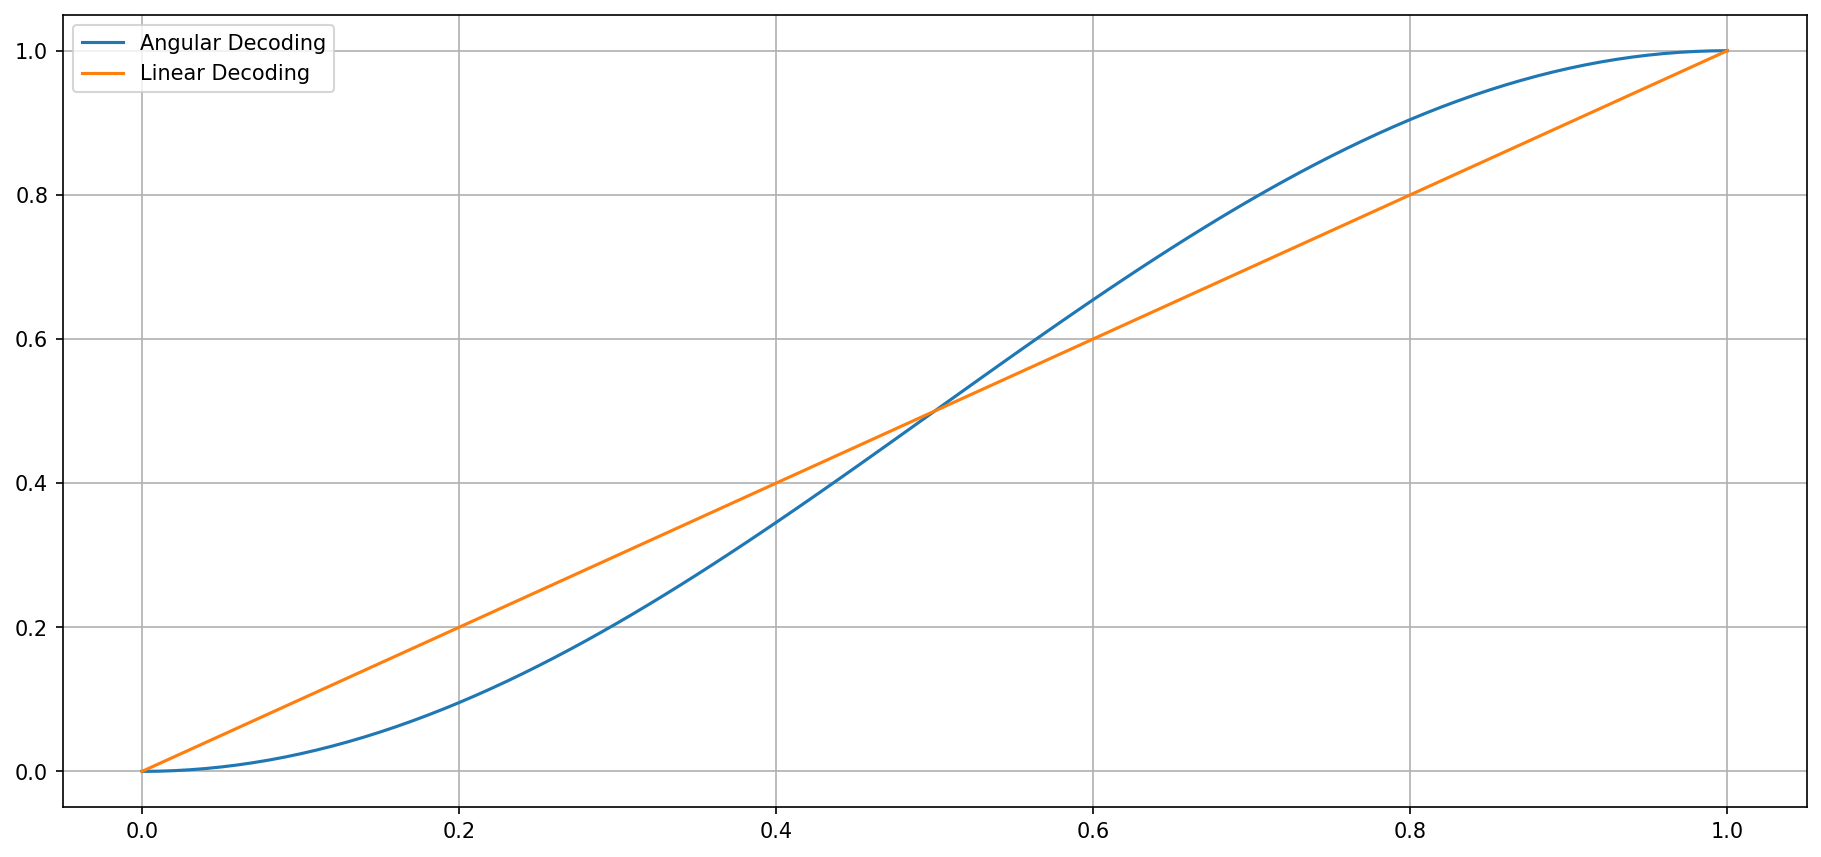

In [4]:
X = [x / 100 for x in range(0, 101)]
Y_angular = [np.square(np.sin((np.pi * x) / 2)) for x in X]
Y_linear = [np.square(np.sin((np.arcsin(2 * x - 1) + np.pi / 2) / 2)) for x in X]
plt.figure(figsize=(15, 7), dpi=150)
plt.plot(X, Y_angular)
plt.plot(X, Y_linear)
plt.legend(["Angular Decoding", "Linear Decoding"])
plt.grid()
plt.show()

**BEWARE**: for $\tau > 1$ the ``LinearModel`` loses its linearity:

$$ \text{Prob. } \lvert 1 \rangle = \sin^2 \left(\frac{\sin^{-1}(2x-1)+\frac{\pi}{2}}{2 \tau} \right) \neq x !!!$$

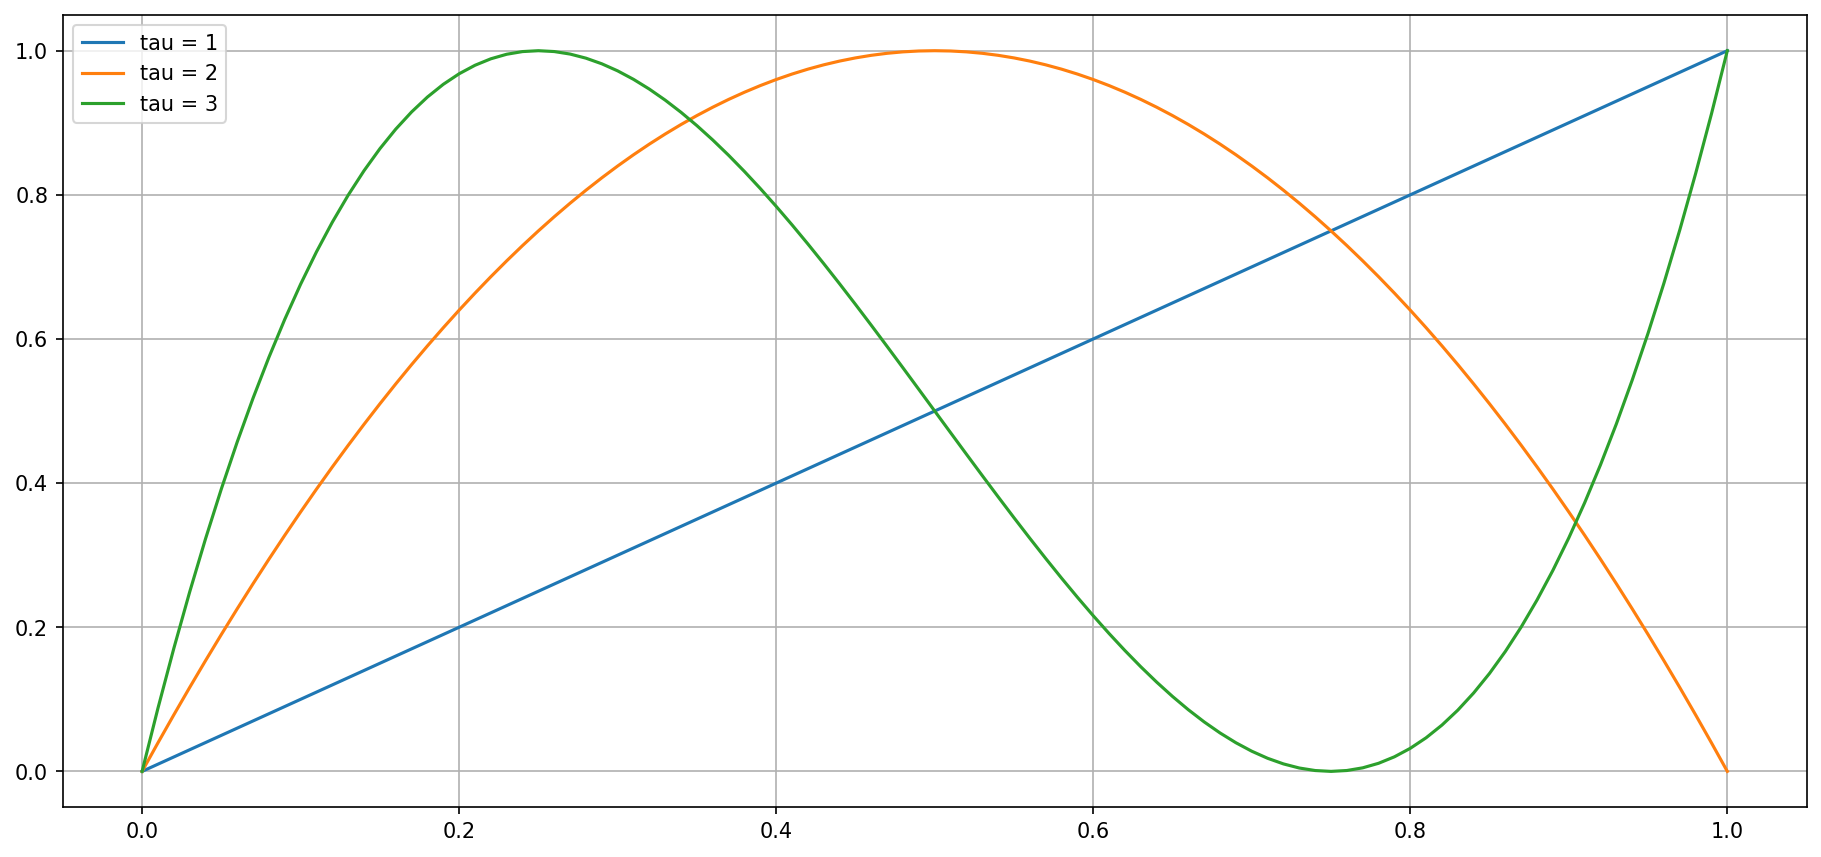

In [5]:
max_tau = 3

X = [x / 100 for x in range(0, 101)]
Y = list()
for tau in range(1, max_tau + 1):
    Y.append(
        [np.square(np.sin((np.arcsin(2 * x - 1) + np.pi / 2) / 2 * tau)) for x in X]
    )

plt.figure(figsize=(15, 7), dpi=150)
labels = list()
for i in range(0, max_tau):
    plt.plot(X, Y[i])
    plt.grid()
    labels.append(f"tau = {i+1}")
plt.legend(labels)
plt.show()

## Input Test

This test will compare the state outcome probability for the Angular (left) and the Linear (right) models for a certain number of input samples $x$ between 0 and 1 include given a fixed $\tau$

In [6]:
input_samples = 10

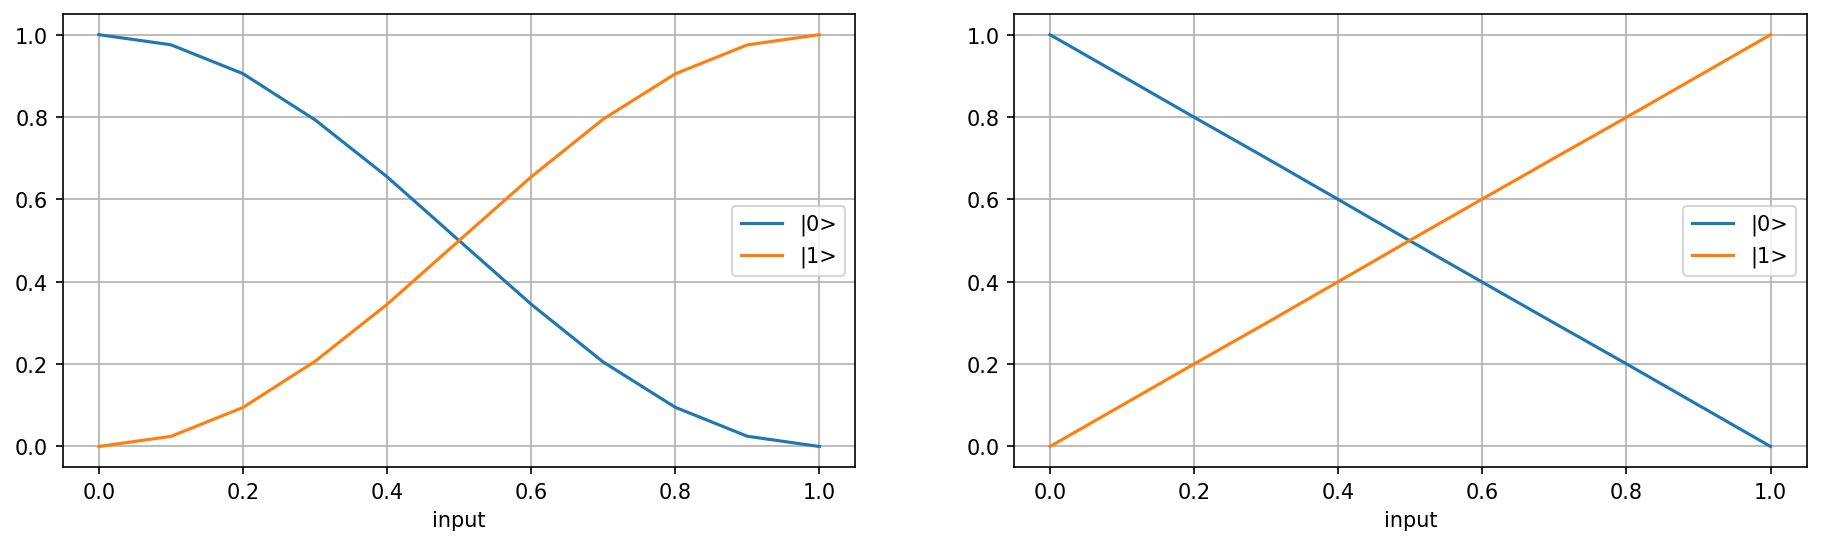

In [7]:
tau = 1
df_angular_input = test_input(AngularModel(1, tau), input_samples, tau, x_label="input")
df_linear_input = test_input(
    LinearModel(1, tau),
    input_samples,
    tau,
    x_label="input",
)
plot_versus(df_angular_input, df_linear_input, x_label="input")

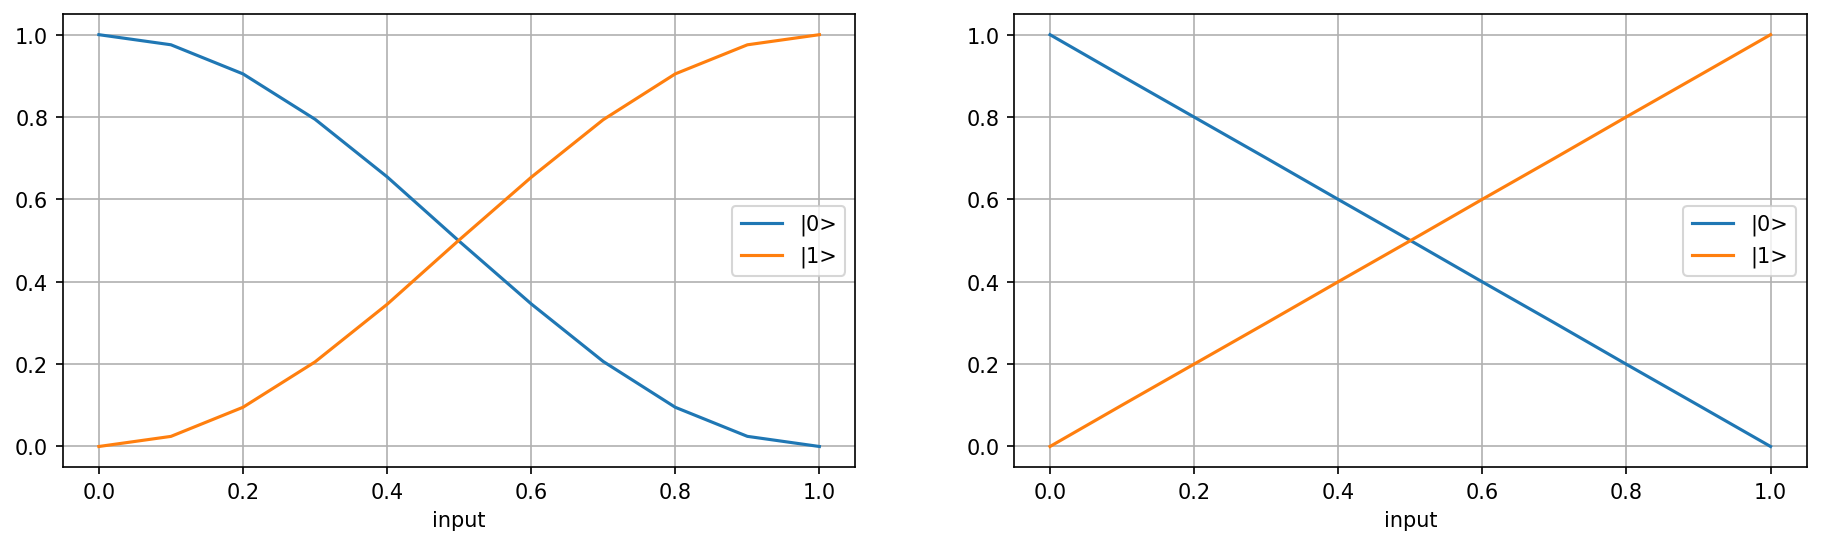

In [8]:
tau = 10
df_angular_input = test_input(AngularModel(1, tau), input_samples, tau, x_label="input")
df_linear_input = test_input(
    LinearModel(1, tau),
    input_samples,
    tau,
    x_label="input",
)
plot_versus(df_angular_input, df_linear_input, x_label="input")

## Queries Test

This test will compare the state outcome probability for the Angular (left) and the Linear (right) models for input samples $x=0.5$ after a query between 0 and 1 performed on the system (the plots represent different queries sampled between 0 and 1). $\tau$ is considered fixed at $\tau = 1$

In [9]:
query_samples = 10

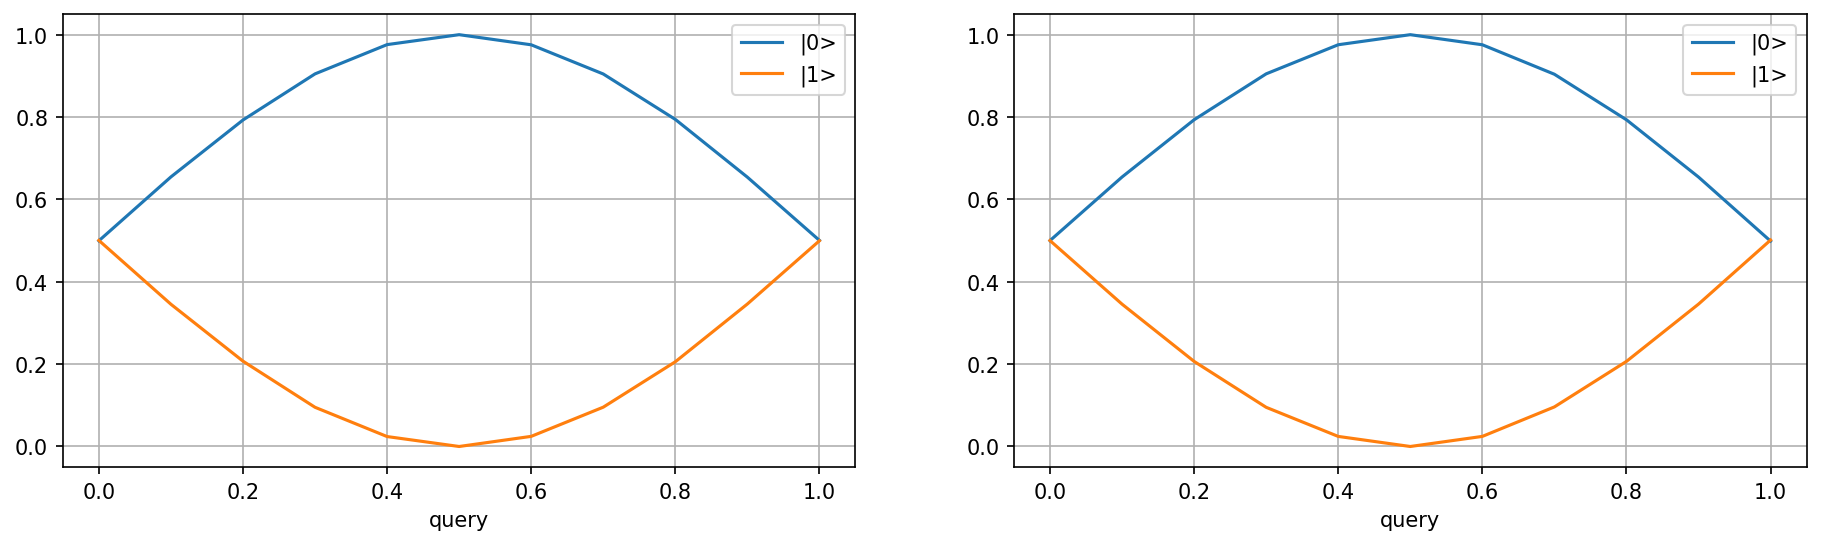

In [10]:
df_angular_query = test_query(AngularModel(1, 1), query_samples, x_label="query")
df_linear_query = test_query(LinearModel(1, 1), query_samples, x_label="query")
plot_versus(df_angular_query, df_linear_query, x_label="query")

## $\tau_{\uparrow}$ Test

$\tau_{\uparrow} \leq  \tau$ is the number of events $x=$ ``intensity`` in a sequence of $\tau$ events (the remaining events are $x=0$). 

For example, considering a sequence long $\tau = 5$, with $\tau_{\uparrow} = 3$ events of ``intensity`` $=0.8$, a possible actual sequence could be:

$$[\; 0.8 \;, \; 0.8 \;, \; 0.8 \;, \; 0.0 \;, \; 0.0\; ]$$

In [11]:
tau = 10

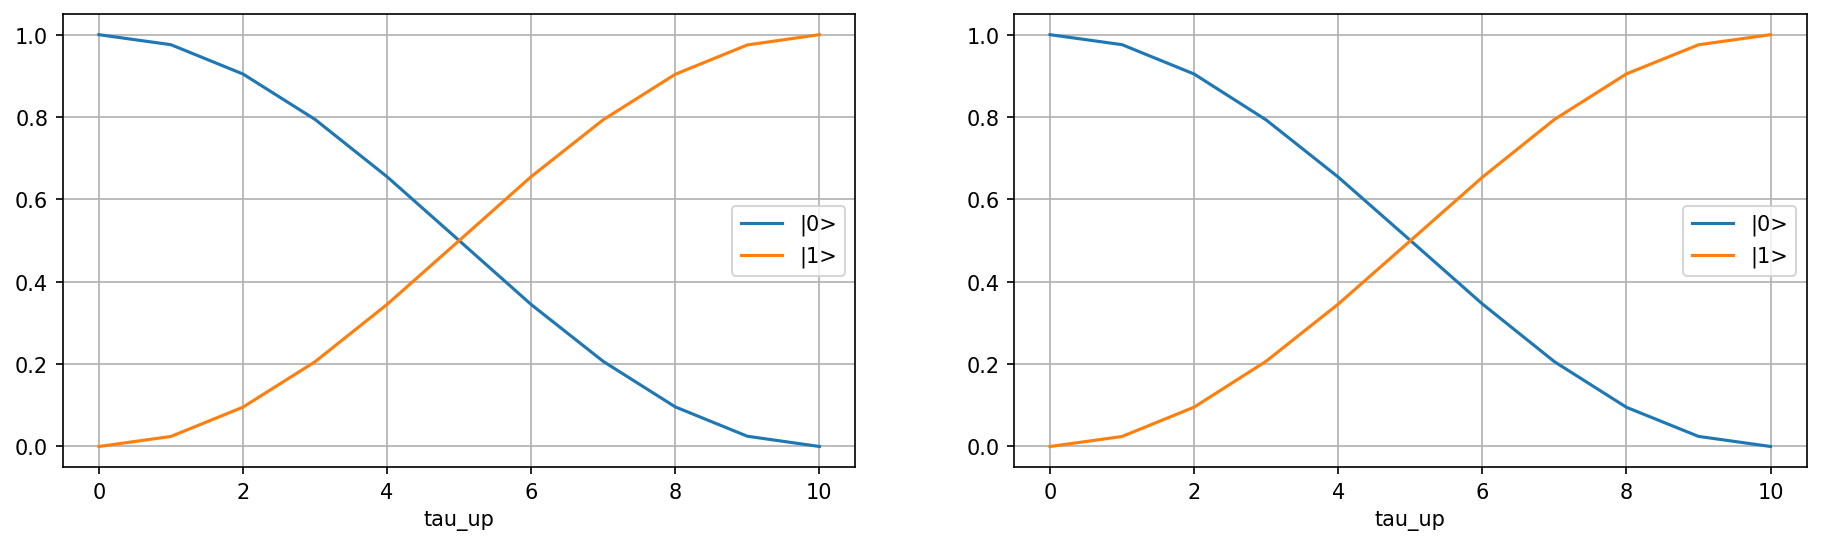

In [12]:
df_angular_tau_up = test_tau_up(AngularModel(1, tau), intensity=1, x_label="tau_up")
df_linear_tau_up = test_tau_up(LinearModel(1, tau), intensity=1, x_label="tau_up")
plot_versus(df_angular_tau_up, df_linear_tau_up, x_label="tau_up")

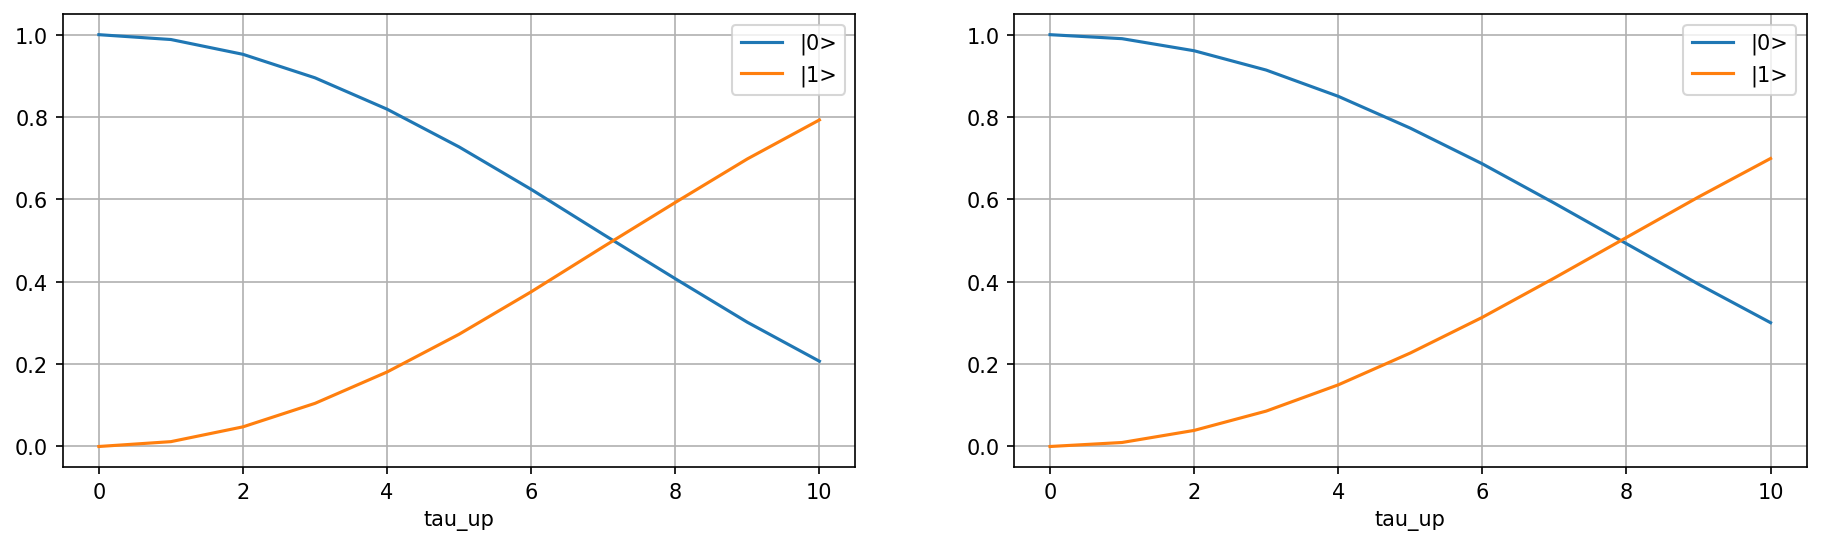

In [13]:
df_angular_tau_up = test_tau_up(AngularModel(1, tau), intensity=0.7, x_label="tau_up")
df_linear_tau_up = test_tau_up(LinearModel(1, tau), intensity=0.7, x_label="tau_up")
plot_versus(df_angular_tau_up, df_linear_tau_up, x_label="tau_up")

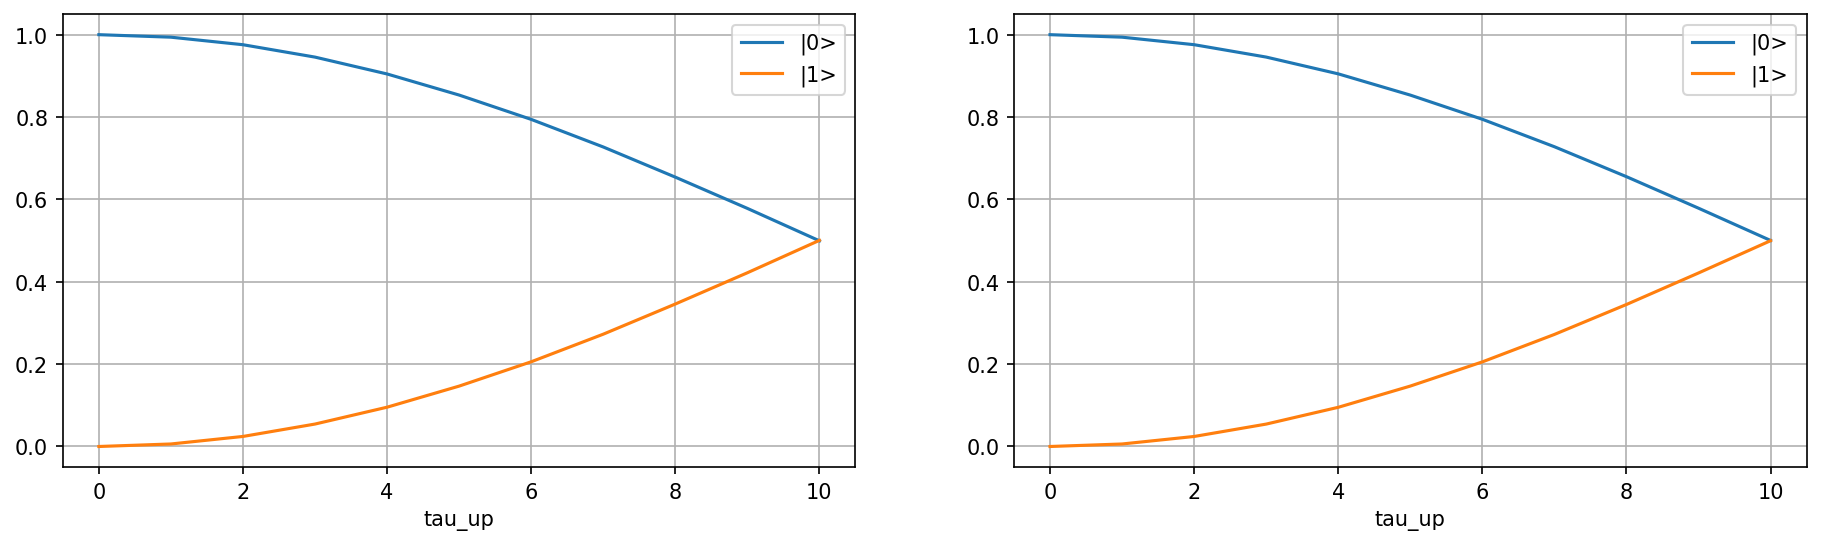

In [14]:
df_angular_tau_up = test_tau_up(AngularModel(1, tau), intensity=0.5, x_label="tau_up")
df_linear_tau_up = test_tau_up(LinearModel(1, tau), intensity=0.5, x_label="tau_up")
plot_versus(df_angular_tau_up, df_linear_tau_up, x_label="tau_up")

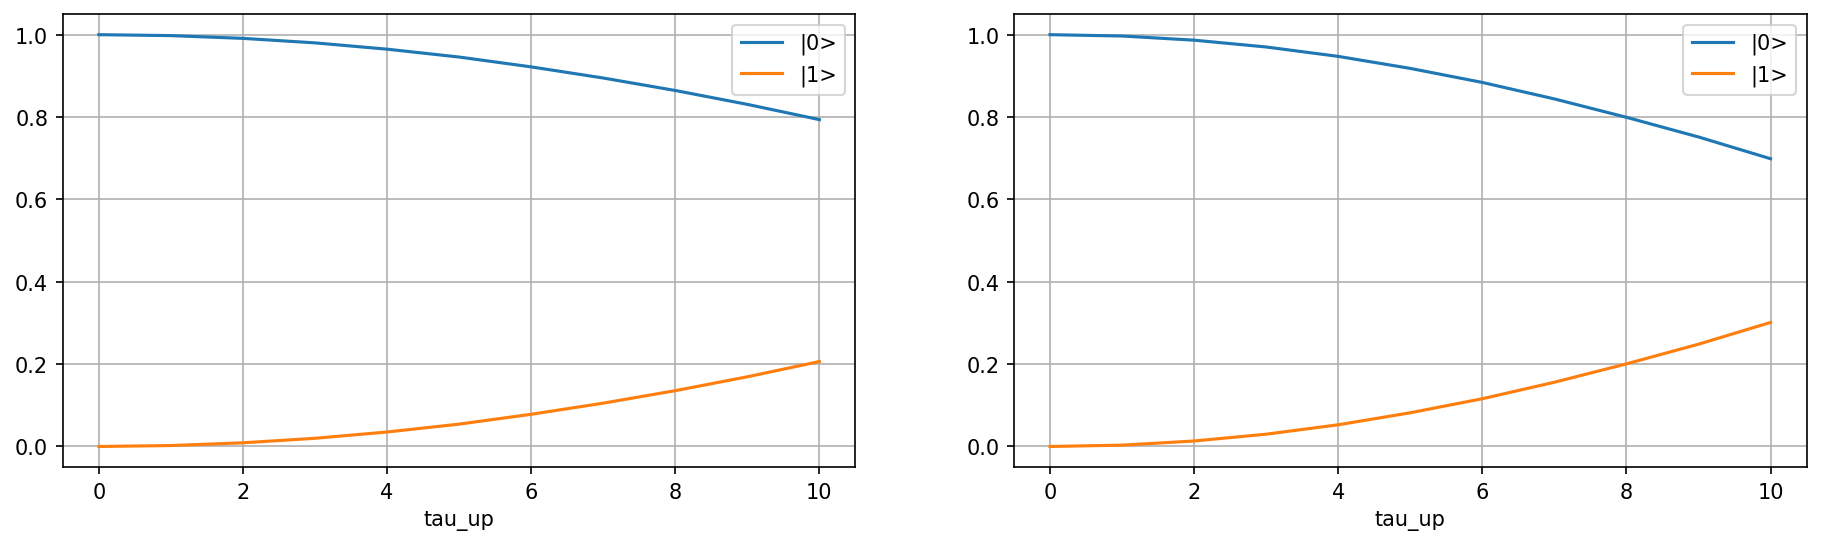

In [15]:
df_angular_tau_up = test_tau_up(AngularModel(1, tau), intensity=0.3, x_label="tau_up")
df_linear_tau_up = test_tau_up(LinearModel(1, tau), intensity=0.3, x_label="tau_up")
plot_versus(df_angular_tau_up, df_linear_tau_up, x_label="tau_up")